pendiente 1.5466666666666666
intercepto 0.0814285714285714
####################################################
coeficiente de correlacion 0.999996208374109
recta y =  1.5466666666666666 x + 0.0814285714285714
Suma de los cuadrados de los residuos:  0.18594285714285752
Varianza de los residuos:  0.0371885714285715
Desviacion estandar de la regresion lineal:  0.19284338575271776
Desviacion estandar de la pendiente:  0.04859196577956072
Desviacion estandar del intercepto:  0.13140061814534826
intervalo de confianza de la pendiente 1.5466666666666666 +/- 0.12488135205347105
intervalo de confianza del intercepto 0.0814285714285714 +/- 0.337699588633545
####################################################


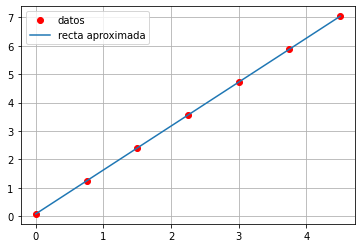

In [2]:
#importamos el modulos de numpy (numeric python)
import numpy as np

#importamos del módulo matplotlib la libreria pyplot con el alias de plt 
import matplotlib.pyplot as plt


#datos que queremos ajustar
x = [0.00, 0.75, 1.50, 2.25, 3.00, 3.75, 4.50]
y = [0.08, 1.25, 2.40, 3.55, 4.72, 5.89, 7.04]


#---------------------------------------------------------
#Calculo de la pendiente (m) y el intercepto (b) de la linealizacion
n = len(x)

#donde almacenaremos los valores de las sumas
suma_xi  = 0
suma_yi  = 0
suma_xixi= 0
suma_yiyi= 0
suma_xiyi= 0
Rss = 0

for i in range( n ):        
    suma_xi   += x[i]
    suma_yi   += y[i]
    suma_xixi += (x[i]-np.mean(x))**2
    suma_yiyi += (y[i]-np.mean(y))**2
    suma_xiyi += (x[i]-np.mean(x))*(y[i]-np.mean(y))

#aplicado las formulas

m = suma_xiyi/suma_xixi

b = np.mean(y)-m*np.mean(x)

r = suma_xiyi/np.sqrt(suma_xixi*suma_yiyi)

# CALCULO DEL RSS, DESVIACION ESTANDAR DE LA REGRESION LINEAL, de m y de b

for i in range( n ):
    Rss += (y[i]-(m*x[i]-b))**2

VarianzaResidual = Rss/(n-2)

DesvEstReg = np.sqrt(Rss/(n-2))

DesvEstPendiente = DesvEstReg/np.sqrt(suma_xixi)

DesvEstIntercepto = DesvEstReg*np.sqrt(1/n+np.mean(x)**2/suma_xixi)

t = 2.57 #valor de t two tailed n = 5, 95%

#Linea recta aproximada
L = m * np.array(x) + b  #note que aqui toca transformar la lista de x a un arreglo!

#---------------------------------------------------------
print("pendiente", m) #m
print("intercepto", b) #b
print("####################################################")
print("coeficiente de correlacion", r) #r
print("recta", "y = ", str(m), "x +", str(b))
print("Suma de los cuadrados de los residuos: ", Rss)
print("Varianza de los residuos: ", VarianzaResidual)
print("Desviacion estandar de la regresion lineal: ", DesvEstReg)
print("Desviacion estandar de la pendiente: ", DesvEstPendiente)
print("Desviacion estandar del intercepto: ", DesvEstIntercepto)
print("intervalo de confianza de la pendiente", str(m) + " +/- " + str(t*DesvEstPendiente))
print("intervalo de confianza del intercepto", str(b) + " +/- " + str(t*DesvEstIntercepto))

print("####################################################")

#--------------graficando---------------------------
#Graficando las parejas de datos
plt.plot(  x  , y , "or" , label="datos" )


#Graficando la recta segun m y b 
plt.plot(  x , L , label="recta aproximada"  )


#mostrando las legendas del grafico
plt.grid()       
plt.legend()
    
#Mostrando el gráfico
plt.show()   



In [4]:
#CALCULO DE LA CONCENTRACION DE UNA MUESTRA DESCONOCIDA
y_o = [3.66, 3.55, 3.67, 3.82]
y_0 = np.mean(y_o)
z = int(input("inserte el numero de determinaciones: "))
x_0 = (y_0 -b )/m
a = (y_0-np.mean(y))/m
Sx_0 = (DesvEstReg/m)*np.sqrt((1/z)+(1/n)+((a**2)/(suma_xixi)))

print("intervalo de confianza de la concentracion de muestra estandar Na2SO4", str(x_0) + " +/- " + str(t*Sx_0))
print("Sx_0", Sx_0)


intervalo de confianza de la concentracion de muestra estandar Na2SO4 2.323429802955665 +/- 0.17138276882116651
Sx_0 0.06668590226504534


In [6]:
#CALCULO DE LIMITES DE DETECCION Y CUANTIFICACION
kld = int(input("inserte el k del sigma menor: "))
klc = int(input("inserte el k del sigma mayor: "))
C_ld = kld*DesvEstReg/m
C_lc = klc*DesvEstReg/m
print("C_ld: ", C_ld)
print("C_lc: ", C_lc)

C_ld:  0.3740496706410474
C_lc:  1.246832235470158
